# 1) 데이터셋 합친 후 순서 섞어서 df에 저장

In [19]:
import pandas as pd

df_drowsy = pd.read_csv('./csv//drowsy_39_Points_2.csv')
df_non_drowsy = pd.read_csv('./csv/non-drowsy_39_Points_2.csv')
df_aug_drowsy = pd.read_csv('./csv//aug_drowsy_39_Points.csv')
df_non_aug_drowsy = pd.read_csv('./csv/aug_non-drowsy_39_Points.csv')

df = pd.concat([df_drowsy, df_non_drowsy, df_aug_drowsy, df_non_aug_drowsy])
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
len(df_drowsy), len(df_non_drowsy), len(df_aug_drowsy), len(df_non_aug_drowsy)

(26167, 23447, 10435, 9175)

In [21]:
len(df)

69224

# 2) Train & Test 셋으로 분리

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55379, 117), (13845, 117), (55379, 2), (13845, 2))

# 3) 모델 생성 후 학습

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(117,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                7552      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 11,842
Trainable params: 11,842
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
1731/1731 [==============================] - 4s 2ms/step - loss: 0.6651 - accuracy: 0.5883 - val_loss: 0.6537 - val_accuracy: 0.5861
Epoch 2/500
1731/1731 [==============================] - 3s 1ms/step - loss: 0.6225 - accuracy: 0.6426 - val_loss: 0.6046 - val_accuracy: 0.6619
Epoch 3/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.5850 - accuracy: 0.6776 - val_loss: 0.5694 - val_accuracy: 0.6870
Epoch 4/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.5613 - accuracy: 0.7035 - val_loss: 0.5559 - val_accuracy: 0.7008
Epoch 5/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.5419 - accuracy: 0.7218 - val_loss: 0.5434 - val_accuracy: 0.7092
Epoch 6/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.7355 - val_loss: 0.5253 - val_accuracy: 0.7278
Epoch 7/500
1731/1731 [==============================] - 3s 1ms/step - loss: 0.5080 - accuracy: 0.7467 - val_loss: 0.5046 - val_ac

1731/1731 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.8804 - val_loss: 0.2865 - val_accuracy: 0.8834
Epoch 58/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.8798 - val_loss: 0.3571 - val_accuracy: 0.8508
Epoch 59/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8797 - val_loss: 0.2970 - val_accuracy: 0.8807
Epoch 60/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2865 - accuracy: 0.8806 - val_loss: 0.2906 - val_accuracy: 0.8810
Epoch 61/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8805 - val_loss: 0.3005 - val_accuracy: 0.8770
Epoch 62/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.8822 - val_loss: 0.2871 - val_accuracy: 0.8899
Epoch 63/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2843 - accuracy: 0.8817 - val_loss: 0.3102 - val_accuracy

1731/1731 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.8986 - val_loss: 0.2630 - val_accuracy: 0.8980
Epoch 114/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.9002 - val_loss: 0.2614 - val_accuracy: 0.8901
Epoch 115/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.8988 - val_loss: 0.2125 - val_accuracy: 0.9195
Epoch 116/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2535 - accuracy: 0.8983 - val_loss: 0.2800 - val_accuracy: 0.8884
Epoch 117/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9007 - val_loss: 0.2803 - val_accuracy: 0.8930
Epoch 118/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2531 - accuracy: 0.8983 - val_loss: 0.3466 - val_accuracy: 0.8599
Epoch 119/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.8993 - val_loss: 0.2799 - val_ac

Epoch 169/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2317 - accuracy: 0.9084 - val_loss: 0.2415 - val_accuracy: 0.9065
Epoch 170/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2358 - accuracy: 0.9078 - val_loss: 0.2346 - val_accuracy: 0.9104
Epoch 171/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2329 - accuracy: 0.9085 - val_loss: 0.4719 - val_accuracy: 0.8242
Epoch 172/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2350 - accuracy: 0.9077 - val_loss: 0.2733 - val_accuracy: 0.9010
Epoch 173/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2328 - accuracy: 0.9101 - val_loss: 0.2831 - val_accuracy: 0.9003
Epoch 174/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2346 - accuracy: 0.9079 - val_loss: 0.2947 - val_accuracy: 0.8857
Epoch 175/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2327 - accuracy: 0.9095 - val_loss: 0

Epoch 225/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2171 - accuracy: 0.9161 - val_loss: 0.2160 - val_accuracy: 0.9248
Epoch 226/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2181 - accuracy: 0.9150 - val_loss: 0.2929 - val_accuracy: 0.8951
Epoch 227/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9143 - val_loss: 0.2531 - val_accuracy: 0.9165
Epoch 228/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2202 - accuracy: 0.9158 - val_loss: 0.2610 - val_accuracy: 0.9030
Epoch 229/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2193 - accuracy: 0.9158 - val_loss: 0.2468 - val_accuracy: 0.9126
Epoch 230/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9159 - val_loss: 0.2416 - val_accuracy: 0.9147
Epoch 231/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9154 - val_loss: 0

Epoch 281/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2096 - accuracy: 0.9198 - val_loss: 0.2867 - val_accuracy: 0.8958
Epoch 282/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2120 - accuracy: 0.9199 - val_loss: 0.2988 - val_accuracy: 0.8938
Epoch 283/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2104 - accuracy: 0.9194 - val_loss: 0.2385 - val_accuracy: 0.9151
Epoch 284/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2098 - accuracy: 0.9194 - val_loss: 0.3853 - val_accuracy: 0.8623
Epoch 285/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2105 - accuracy: 0.9191 - val_loss: 0.2429 - val_accuracy: 0.9130
Epoch 286/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2131 - accuracy: 0.9194 - val_loss: 0.2740 - val_accuracy: 0.9096
Epoch 287/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2107 - accuracy: 0.9209 - val_loss: 0

Epoch 337/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2079 - accuracy: 0.9199 - val_loss: 0.2258 - val_accuracy: 0.9187
Epoch 338/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2093 - accuracy: 0.9208 - val_loss: 0.2608 - val_accuracy: 0.9099
Epoch 339/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2059 - accuracy: 0.9214 - val_loss: 0.2469 - val_accuracy: 0.9083
Epoch 340/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2059 - accuracy: 0.9213 - val_loss: 0.2478 - val_accuracy: 0.9098
Epoch 341/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2065 - accuracy: 0.9206 - val_loss: 0.2114 - val_accuracy: 0.9231
Epoch 342/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2083 - accuracy: 0.9211 - val_loss: 0.2833 - val_accuracy: 0.9039
Epoch 343/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2081 - accuracy: 0.9216 - val_loss: 0

Epoch 393/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2115 - accuracy: 0.9193 - val_loss: 0.2073 - val_accuracy: 0.9225
Epoch 394/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2113 - accuracy: 0.9197 - val_loss: 0.2066 - val_accuracy: 0.9322
Epoch 395/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2095 - accuracy: 0.9194 - val_loss: 0.2269 - val_accuracy: 0.9203
Epoch 396/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2127 - accuracy: 0.9183 - val_loss: 0.2338 - val_accuracy: 0.9148
Epoch 397/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2128 - accuracy: 0.9184 - val_loss: 0.3961 - val_accuracy: 0.8663
Epoch 398/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2142 - accuracy: 0.9168 - val_loss: 0.1961 - val_accuracy: 0.9273
Epoch 399/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2129 - accuracy: 0.9192 - val_loss: 0

Epoch 449/500
1731/1731 [==============================] - 4s 2ms/step - loss: 0.2213 - accuracy: 0.9158 - val_loss: 0.2264 - val_accuracy: 0.9182
Epoch 450/500
1731/1731 [==============================] - 4s 2ms/step - loss: 0.2173 - accuracy: 0.9167 - val_loss: 0.2809 - val_accuracy: 0.9057
Epoch 451/500
1731/1731 [==============================] - 4s 2ms/step - loss: 0.2161 - accuracy: 0.9174 - val_loss: 0.2335 - val_accuracy: 0.9191
Epoch 452/500
1731/1731 [==============================] - 4s 2ms/step - loss: 0.2179 - accuracy: 0.9157 - val_loss: 0.2262 - val_accuracy: 0.9193
Epoch 453/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9171 - val_loss: 0.2346 - val_accuracy: 0.9075
Epoch 454/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2172 - accuracy: 0.9171 - val_loss: 0.2550 - val_accuracy: 0.9062
Epoch 455/500
1731/1731 [==============================] - 3s 2ms/step - loss: 0.2202 - accuracy: 0.9161 - val_loss: 0

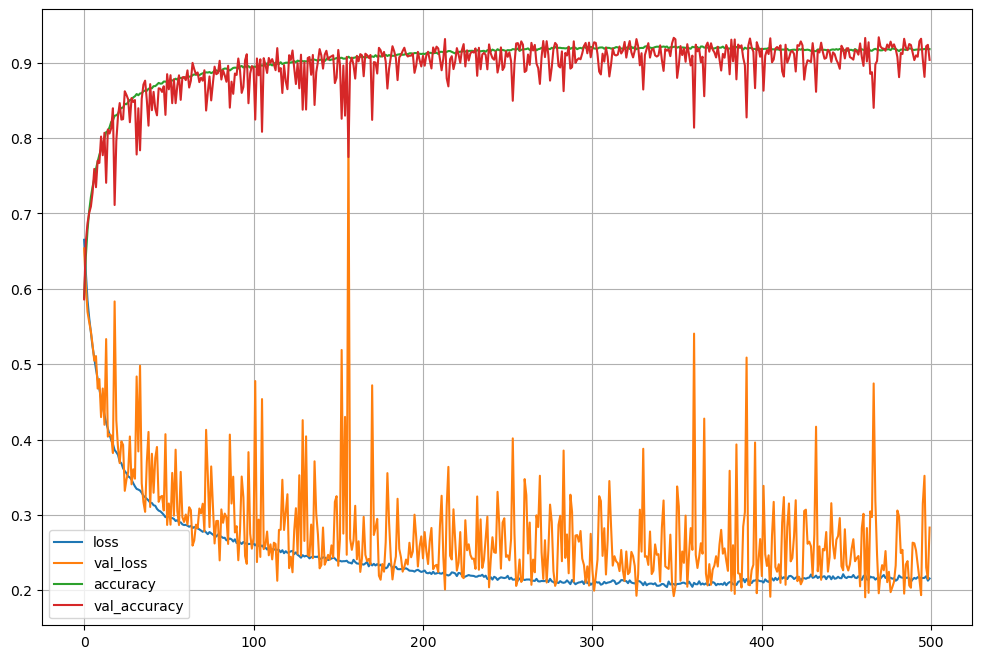

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

433/433 [==============================] - 0s 974us/step - loss: 0.2831 - accuracy: 0.9039
Accuracy = 0.90


# 4) 테스트

In [32]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe.framework.formats import landmark_pb2

mp_face_mesh = mp.solutions.face_mesh

In [38]:
land_list = [46, 53, 52, 55, 65, 276, 283, 282, 295, 285, 130, 160, 158, 133, 153, 144, 359, 387, 385, 362, 380, 373,
             168, 6, 195, 4, 61, 39, 0, 269, 291, 405, 17, 181, 234, 132, 152, 288, 454]
cName = "Non-Drowsy "
cap = cv2.VideoCapture(0)
dTime = 0

with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            point_list = []
            for i in land_list:
                point_list.append(results.multi_face_landmarks[0].landmark[i])

            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp = np.array(temp).reshape(1, 117)
        
            classes = model.predict(temp)[0]
            if(classes[0] < classes[1]):
                if dTime >= 30:
                    cName = "Wake UP!!! "
                else:
                    cName = "Drowsy "
                dTime += 1
            else:
                cName = "Non-Drowsy "
                dTime = 0
            
            image = cv2.flip(image, 1)
            cv2.putText(image, cName + str(dTime), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (98, 17, 0), 2, cv2.LINE_AA)
            
            cv2.imshow('MediaPipe Face Mesh', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
                
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


In [35]:
model.save('./model/model03')

INFO:tensorflow:Assets written to: ./model/model03\assets
